In [1]:
# import useful libraries
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# Data Overview


In [2]:
import pandas as pd
path = 'loan.csv'
df=pd.read_csv(path)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [3]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
#  I focus into 2 scenarios: Fully paid and Charged-off
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

# Data cleaning

## Drop data

### Drop Current Rows in loan_status columns
>  I forcus in 2 main scenarios: CHARGED OFF and FUllY PAID 

In [7]:
# drop Current Status
df =df[(df['loan_status']!='Current')]

### Drop columns with many null values

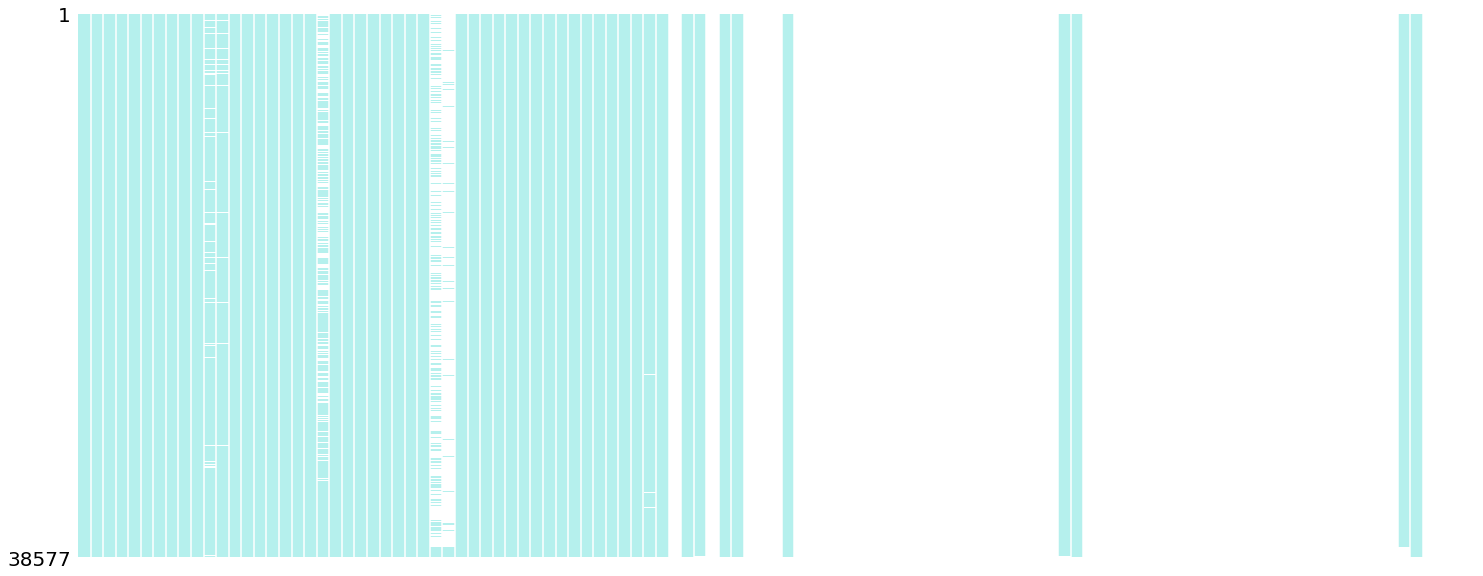

In [8]:
#overview missing data
fig = msno.matrix(df,sparkline=False,
                      color=( 181/255, 240/255, 237/255 ))
plt.show()

In [9]:
# check null ratio
r_null = 100*(df.isnull().sum()/len((df)))
null_colummns = r_null[r_null > 0].sort_values(ascending = False)
print(f'number of columns with null values per total columns: {len(null_colummns)}/{len(df.columns)}')


number of columns with null values per total columns: 68/111


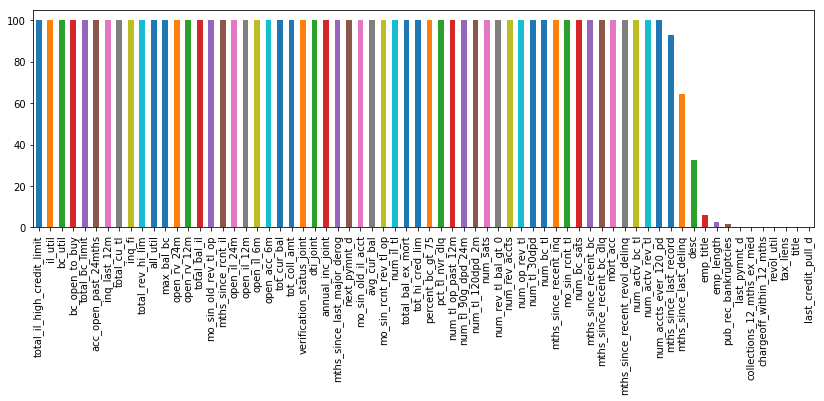

In [10]:
null_colummns.plot(kind='bar',figsize=(14,4))
plt.show()

In [11]:
null_colummns_90 = r_null[r_null > 90].sort_values(ascending = False)
print('number of columns with 90% null values:',len(null_colummns))
null_colummns_90

number of columns with 90% null values: 68


total_il_high_credit_limit        100.000000
total_bc_limit                    100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6m                       100.000000
tot_cur_bal                       100.000000
tot_coll_amt                      100.000000
verificati

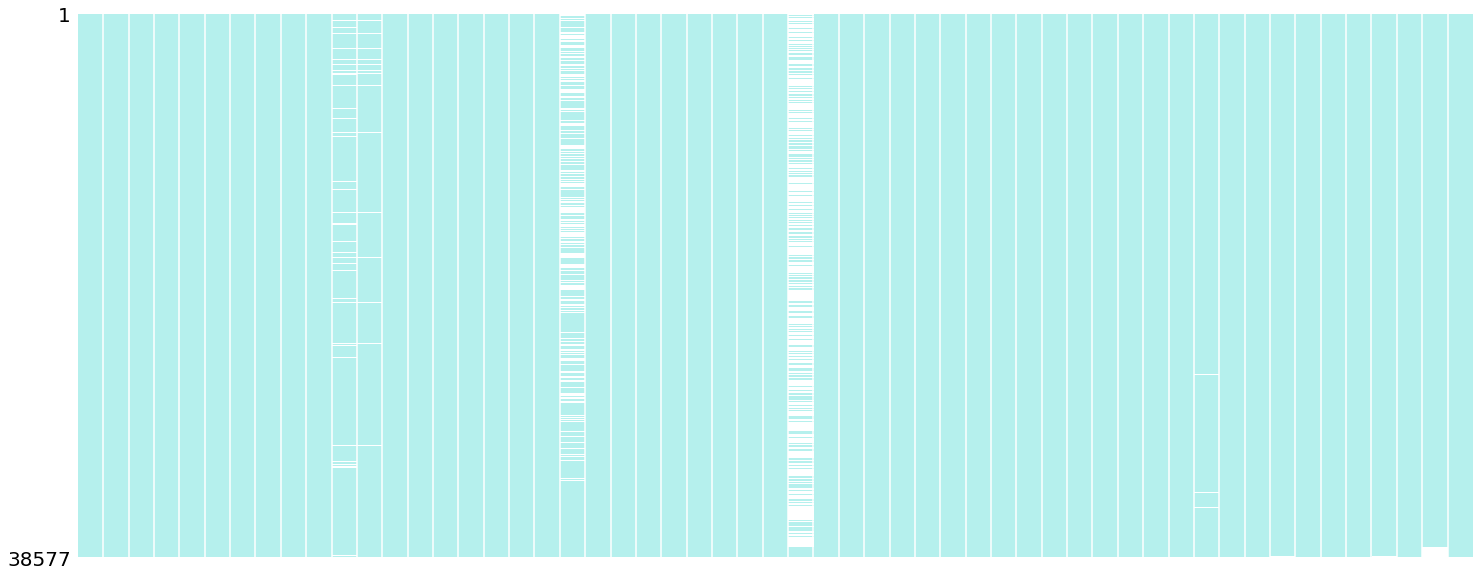

In [12]:
df = df.drop(columns=list(null_colummns_90.index))
#overview missing data
fig = msno.matrix(df,sparkline=False,
                      color=( 181/255, 240/255, 237/255 ))
plt.show()

### drop columns with only one values

In [13]:
columns  = list(df.columns)
columns_vales_count = {c : len(df[c].value_counts().index) for c in columns}
columns_vales_count

{'id': 38577,
 'member_id': 38577,
 'loan_amnt': 870,
 'funded_amnt': 1019,
 'funded_amnt_inv': 8050,
 'term': 2,
 'int_rate': 370,
 'installment': 15022,
 'grade': 7,
 'sub_grade': 35,
 'emp_title': 28027,
 'emp_length': 11,
 'home_ownership': 5,
 'annual_inc': 5215,
 'verification_status': 3,
 'issue_d': 55,
 'loan_status': 2,
 'pymnt_plan': 1,
 'url': 38577,
 'desc': 25803,
 'purpose': 14,
 'title': 19297,
 'zip_code': 822,
 'addr_state': 50,
 'dti': 2853,
 'delinq_2yrs': 11,
 'earliest_cr_line': 524,
 'inq_last_6mths': 9,
 'mths_since_last_delinq': 95,
 'open_acc': 40,
 'pub_rec': 5,
 'revol_bal': 21275,
 'revol_util': 1088,
 'total_acc': 82,
 'initial_list_status': 1,
 'out_prncp': 1,
 'out_prncp_inv': 1,
 'total_pymnt': 36714,
 'total_pymnt_inv': 36387,
 'total_rec_prncp': 6841,
 'total_rec_int': 34025,
 'total_rec_late_fee': 1320,
 'recoveries': 4040,
 'collection_recovery_fee': 2616,
 'last_pymnt_d': 101,
 'last_pymnt_amnt': 34418,
 'last_credit_pull_d': 106,
 'collections_12_m

In [14]:
# columns has only 1  values
one_value_column = [c for c,v in columns_vales_count.items() if v <2 ]
one_value_column

['pymnt_plan',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [15]:
df = df.drop(columns=one_value_column)


### Drop unessecery columns:
1. id columns
2. columns with description meaning
3. columns which cannot be used for calculation
4. The columns have similar meanings

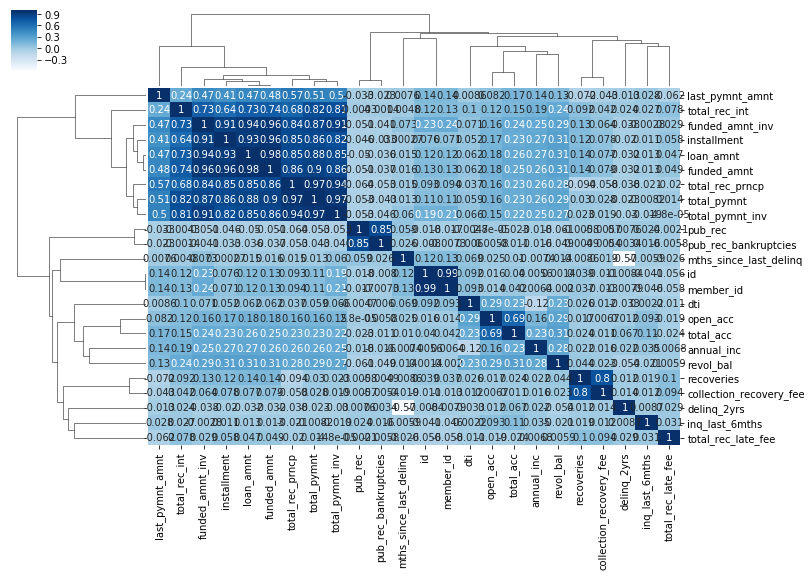

In [16]:
# base on Correlation Matrix to find similar-meaning-column-group
corr = df.corr()
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plt.show()

In [17]:

unnessesary_columns = ['url','member_id','id','emp_title','funded_amnt_inv','desc', 'title','sub_grade',
    'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
    'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 
    'total_pymnt_inv', 'total_rec_prncp', 
    'total_rec_int', 'total_rec_late_fee', 'recoveries', 
    'collection_recovery_fee', 'last_pymnt_d', 
    'last_pymnt_amnt', 'last_credit_pull_d', 'addr_state' ]

In [18]:
df = df.drop(columns=unnessesary_columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
loan_amnt                 38577 non-null int64
funded_amnt               38577 non-null int64
term                      38577 non-null object
int_rate                  38577 non-null object
installment               38577 non-null float64
grade                     38577 non-null object
emp_length                37544 non-null object
home_ownership            38577 non-null object
annual_inc                38577 non-null float64
verification_status       38577 non-null object
issue_d                   38577 non-null object
loan_status               38577 non-null object
purpose                   38577 non-null object
zip_code                  38577 non-null object
dti                       38577 non-null float64
mths_since_last_delinq    13672 non-null float64
revol_util                38527 non-null object
total_pymnt               38577 non-null float64
pub_rec_bankruptcies    

##  Transform columns
1. term - It has two values, 36 months and 60 months. I'll convert them to numerical as follows:
    * 36 months will be converted to 36
    * 60 months will be converted to 60
2. Int_rate - It is shown as a percentage number. I'll convert it to a float by removing the percentage sign:
    * For example, 12.5% will be converted to 12.5
3. Revol_util - It is shown as a percentage number. I'll convert it to a float by removing the percentage sign:
    * For example, 30.5% will be converted to 30.5
4. Emp_length - It ranges from "< 1 year" to "10+ years." I'll convert it to numerical values as follows:
    * "< 1 year" will be converted to 0
    * "1 year" will be converted to 1
    * "2 years" will be converted to 2
    * ...
    * "10+ years" will be converted to 10
5. Issue_d - It is in the format "Nov-11." I'll create two numerical columns, "issue_m" for the month and "issue_y" for the year. For example, "Nov-11" will be converted to:
    * issue_m: 11
    * issue_y: 2011


In [19]:
df['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [20]:
df['term'] = list(map(lambda x: int(x[:3]), df['term']))
df['term'].value_counts()


36    29096
60     9481
Name: term, dtype: int64

In [21]:
df['int_rate'].value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
7.49%     651
9.99%     590
7.90%     574
5.42%     573
11.71%    559
11.99%    483
10.37%    467
12.69%    451
6.03%     447
8.49%     434
5.79%     410
12.99%    409
10.65%    403
12.42%    403
7.29%     397
6.62%     396
11.86%    391
8.90%     386
9.63%     378
10.59%    358
9.91%     357
5.99%     347
14.27%    344
7.14%     341
6.99%     336
         ... 
10.64%      2
17.15%      2
14.25%      2
14.70%      2
17.03%      2
16.33%      2
15.83%      2
14.62%      2
15.07%      2
14.07%      2
13.84%      2
14.88%      2
15.01%      2
22.94%      1
16.20%      1
16.71%      1
14.67%      1
16.15%      1
17.54%      1
17.34%      1
16.96%      1
21.48%      1
16.01%      1
17.46%      1
24.40%      1
18.72%      1
20.52%      1
17.44%      1
18.36%      1
22.64%      1
Name: int_rate, Length: 370, dtype: int64

In [22]:
df['int_rate'] = df['int_rate'].apply(lambda x : float(x[:-1]))
df['int_rate'].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
7.49     651
9.99     590
7.90     574
5.42     573
11.71    559
11.99    483
10.37    467
12.69    451
6.03     447
8.49     434
5.79     410
12.99    409
12.42    403
10.65    403
7.29     397
6.62     396
11.86    391
8.90     386
9.63     378
10.59    358
9.91     357
5.99     347
14.27    344
7.14     341
6.99     336
        ... 
15.83      2
13.84      2
14.62      2
17.15      2
14.07      2
14.88      2
15.38      2
15.01      2
14.25      2
14.70      2
17.03      2
15.07      2
20.20      2
16.20      1
17.54      1
16.96      1
17.44      1
16.15      1
14.67      1
22.94      1
24.40      1
18.36      1
17.34      1
16.01      1
18.72      1
17.46      1
16.71      1
21.48      1
20.52      1
22.64      1
Name: int_rate, Length: 370, dtype: int64

In [23]:
list(df['revol_util'].value_counts().index)


['0%',
 '63%',
 '0.20%',
 '31.20%',
 '40.70%',
 '70.40%',
 '61%',
 '66.70%',
 '66.60%',
 '37.60%',
 '0.10%',
 '46.40%',
 '57.40%',
 '64.60%',
 '46.60%',
 '32%',
 '75.50%',
 '64.80%',
 '49.80%',
 '70.80%',
 '35.30%',
 '34.40%',
 '65.90%',
 '48.90%',
 '25.50%',
 '68.70%',
 '47.80%',
 '51.10%',
 '36.50%',
 '48.20%',
 '72.10%',
 '48%',
 '45.60%',
 '51.60%',
 '33.70%',
 '89.50%',
 '41%',
 '88%',
 '54.30%',
 '41.60%',
 '55.80%',
 '78.70%',
 '49.10%',
 '89.90%',
 '74.90%',
 '76.60%',
 '27.20%',
 '68.60%',
 '53.90%',
 '55.50%',
 '52.30%',
 '29.10%',
 '62%',
 '64.30%',
 '54.60%',
 '73.20%',
 '57.20%',
 '33.30%',
 '62.80%',
 '55.10%',
 '23%',
 '30.90%',
 '57.70%',
 '7.20%',
 '52.40%',
 '49.60%',
 '79.50%',
 '40.20%',
 '53.70%',
 '41.40%',
 '60.20%',
 '21.50%',
 '55.40%',
 '55.20%',
 '43.40%',
 '58.70%',
 '45.90%',
 '70.30%',
 '47.40%',
 '23.80%',
 '56.70%',
 '66.90%',
 '74.40%',
 '44.10%',
 '57.80%',
 '59.60%',
 '70.10%',
 '26.70%',
 '48.70%',
 '1%',
 '76%',
 '44.70%',
 '55.70%',
 '57.90%',
 '54

In [24]:
df['revol_util'] = df['revol_util'].str.rstrip('%').astype(float)
df['revol_util'].value_counts()

0.00     954
63.00     62
0.20      62
40.70     57
31.20     57
66.70     56
61.00     56
70.40     56
37.60     55
66.60     55
46.40     55
0.10      55
57.40     55
32.00     54
75.50     54
64.80     54
46.60     54
64.60     54
25.50     53
35.30     53
70.80     53
68.70     53
49.80     53
65.90     53
48.90     53
34.40     53
48.20     52
51.60     52
51.10     52
47.80     52
        ... 
0.12       1
54.22      1
17.67      1
81.31      1
36.94      1
23.11      1
5.34       1
32.71      1
47.36      1
33.26      1
0.04       1
37.63      1
38.77      1
11.63      1
58.77      1
7.43       1
3.18       1
46.74      1
7.28       1
43.61      1
21.59      1
28.41      1
29.77      1
24.89      1
8.01       1
24.63      1
26.33      1
11.62      1
70.26      1
0.49       1
Name: revol_util, Length: 1088, dtype: int64

In [25]:
df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [26]:
df['emp_length'] = df['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3, 
                                                         '7 years': 7, '4 years': 4, '5 years': 5, 
                                                         '1 year': 1, '6 years': 6, '8 years': 8, 
                                                         '9 years': 9,  '10+ years': 10})

df['emp_length'].value_counts()

10.0    8488
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

In [27]:
df['issue_d'].value_counts()

Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
Aug-08      71
May-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [28]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_y'] = pd.DatetimeIndex(df['issue_d']).year
df['issue_m'] = pd.DatetimeIndex(df['issue_d']).month
# df= df.drop(columns='issue_d')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
loan_amnt                 38577 non-null int64
funded_amnt               38577 non-null int64
term                      38577 non-null int64
int_rate                  38577 non-null float64
installment               38577 non-null float64
grade                     38577 non-null object
emp_length                37544 non-null float64
home_ownership            38577 non-null object
annual_inc                38577 non-null float64
verification_status       38577 non-null object
issue_d                   38577 non-null datetime64[ns]
loan_status               38577 non-null object
purpose                   38577 non-null object
zip_code                  38577 non-null object
dti                       38577 non-null float64
mths_since_last_delinq    13672 non-null float64
revol_util                38527 non-null float64
total_pymnt               38577 non-null float64
pub_rec_bankru

## fillna
1. I've decided to drop rows with missing values in the columns "pub_rec_bankruptcies," "emp_length," and "revol_util" since these columns have relatively few NaN (missing) values.
2. I fill 0 values in NaN in conlumns mths_since_last_delinq

number of columns with null values per total columns: 4/21


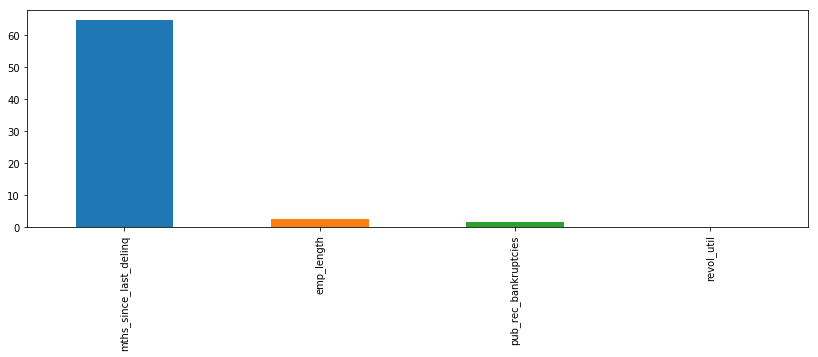

In [30]:
# check NAN columns again
# check nullratio
r_null = 100*(df.isnull().sum()/len((df)))
null_colummns = r_null[r_null > 0].sort_values(ascending = False)
print(f'number of columns with null values per total columns: {len(null_colummns)}/{len(df.columns)}')
null_colummns.plot(kind='bar',figsize=(14,4))
plt.show()


In [31]:
null_colummns

mths_since_last_delinq    64.559193
emp_length                 2.677761
pub_rec_bankruptcies       1.806776
revol_util                 0.129611
dtype: float64

In [32]:
# pub_rec_bankruptcies, emp_length and revol_util have less nan so I decide to drop rows
print('total row before dropping:', df.shape[0])
numrow_before = df.shape[0]
df = df.dropna(subset=['emp_length','pub_rec_bankruptcies','revol_util'])
print('total row after dropping:', df.shape[0])
print('num deleted row:', numrow_before - df.shape[0])

total row before dropping: 38577
total row after dropping: 36800
num deleted row: 1777


In [33]:
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(0)

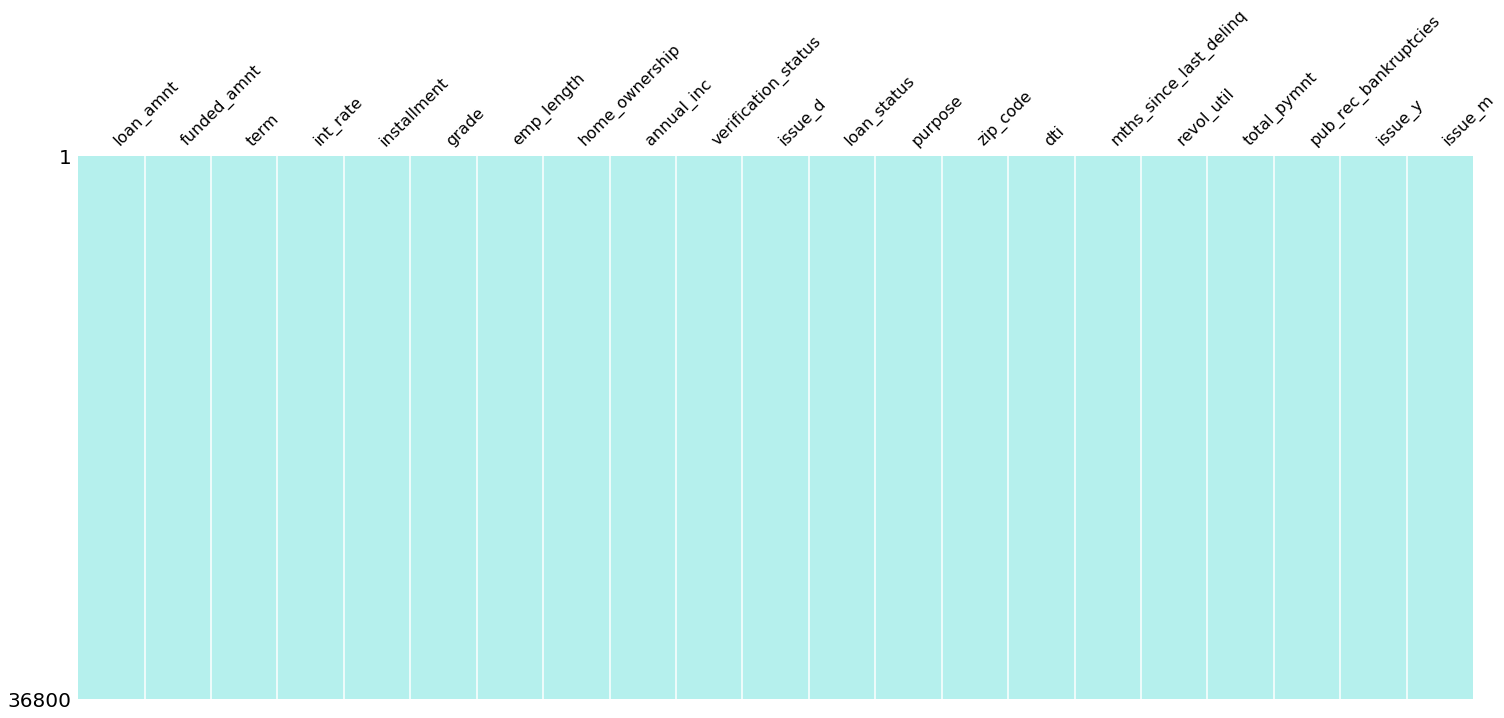

In [34]:
#check missing data again
fig = msno.matrix(df,sparkline=False,
                      color=( 181/255, 240/255, 237/255 ))
plt.show()

## Drop outlier after fillna

In [35]:
def drop_outliner(df, col):
    old_rows = len(df)
    q25 = df[col].quantile(0.25)
    q75 = df[col].quantile(0.75)
    iqr = q75 - q25
    upper = q75 + 1.5 * iqr
    new_df = df[df[col] < upper]
    new_rows = len(new_df)
    print('Percentage of dropped row: ', round((old_rows - new_rows)/old_rows*100,2), "%")
    return new_df
ana_boxplot_columns = ['loan_amnt', 'funded_amnt','int_rate', 'installment',
                        'annual_inc', 'dti','total_pymnt']
for c in ana_boxplot_columns:
    print(f'drop outlier for {c}')
    df= drop_outliner(df,c)

drop outlier for loan_amnt
Percentage of dropped row:  2.93 %
drop outlier for funded_amnt
Percentage of dropped row:  0.08 %
drop outlier for int_rate
Percentage of dropped row:  0.18 %
drop outlier for installment
Percentage of dropped row:  2.92 %
drop outlier for annual_inc
Percentage of dropped row:  4.33 %
drop outlier for dti
Percentage of dropped row:  0.0 %
drop outlier for total_pymnt
Percentage of dropped row:  2.12 %


# Univatiate Analysis

## plot dist and box

In [36]:
def univariate_analysis1(df, column):
    df1= df[df['loan_status']=='Fully Paid']
    df2 = df[df['loan_status']=='Charged Off']
    _, p = plt.subplots(2,2, figsize=(16, 4))
    sns.distplot(df1.loc[df1[column].notnull(), column], kde=True, hist=True, ax=p[0][0])
    sns.boxplot(x=column, data=df1, ax=p[0][1])
    sns.distplot(df2.loc[df2[column].notnull(), column], kde=True, hist=True, ax=p[1][0])
    sns.boxplot(x=column, data=df2, ax=p[1][1])
    p[0][0].set_xlabel(f'{column}_Fully Paid')
    p[0][1].set_xlabel(f'{column}_Fully Paid')
    p[1][0].set_xlabel(f'{column}_Charged Off')
    p[1][1].set_xlabel(f'{column}_Charged Off')
    plt.tight_layout()
    plt.show()

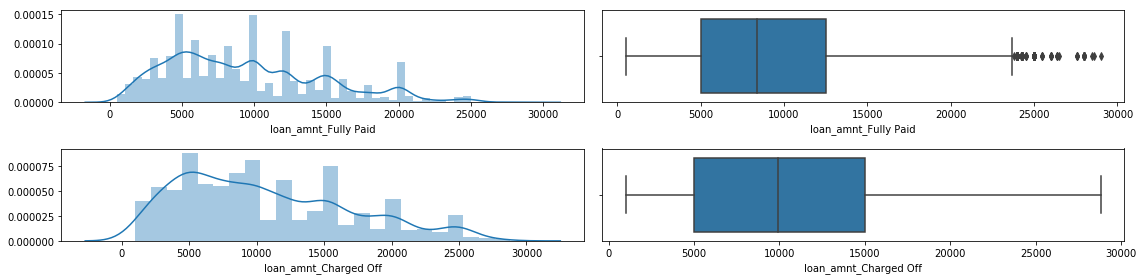

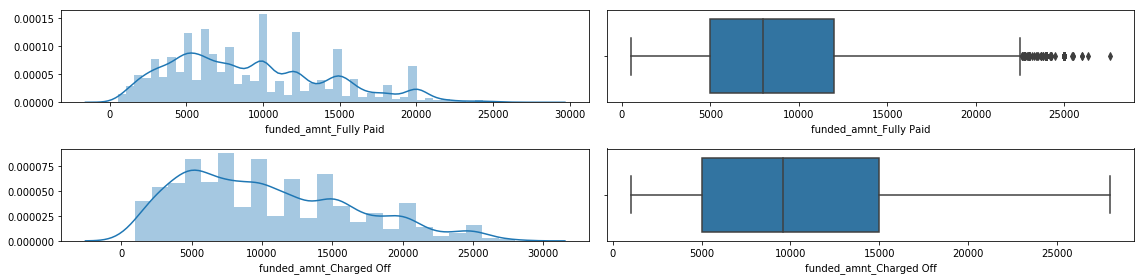

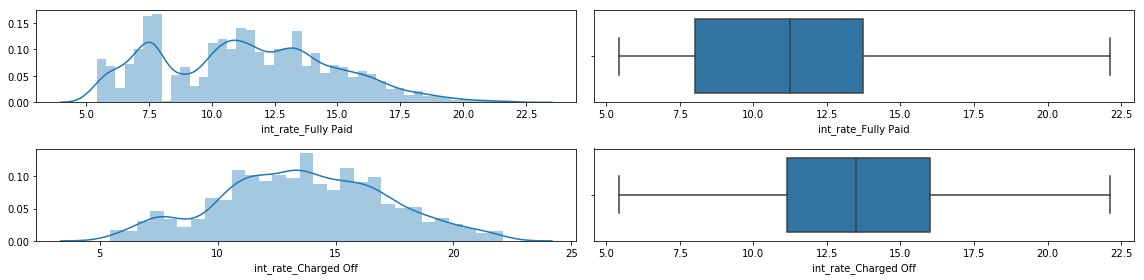

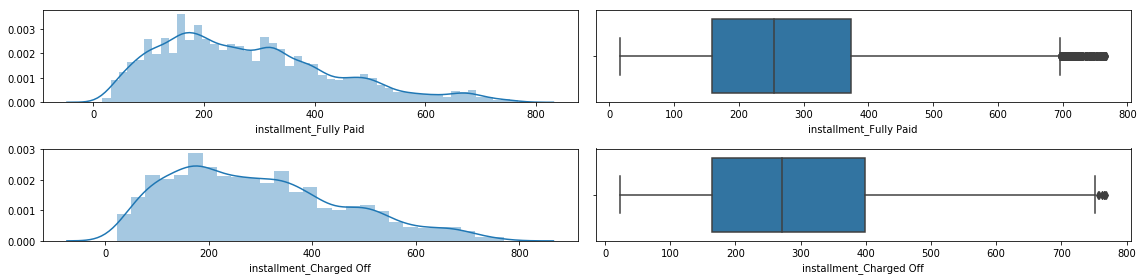

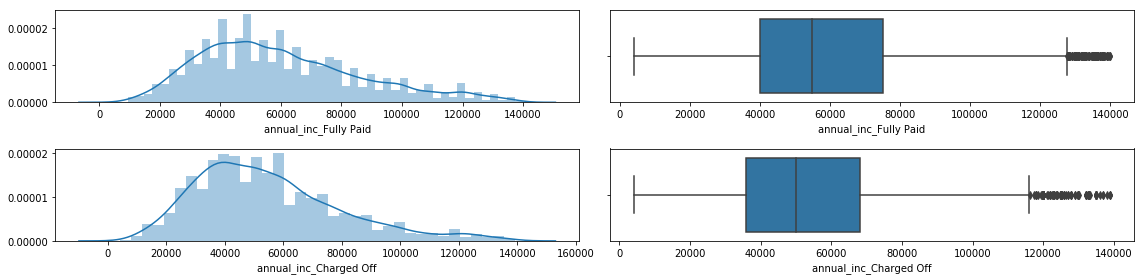

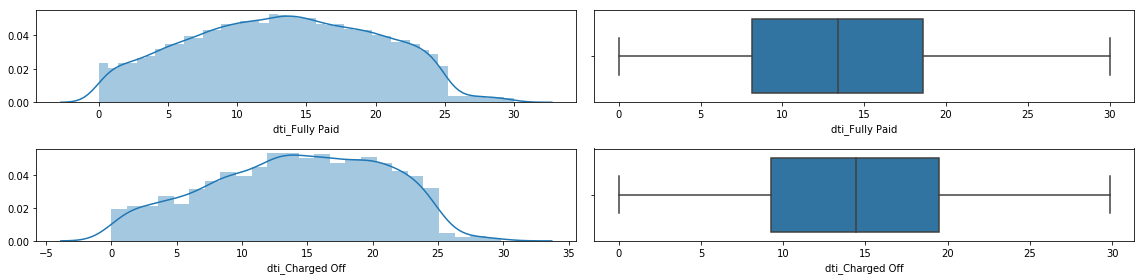

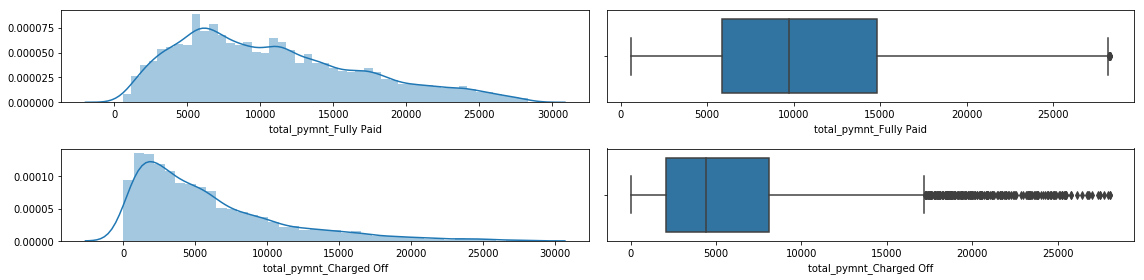

In [37]:
ana_boxplot_columns = ['loan_amnt', 'funded_amnt','int_rate', 'installment',
                        'annual_inc', 'dti','total_pymnt']
for c in ana_boxplot_columns:
    univariate_analysis1(df, c)

> I've noticed that there's a slight shift in the distribution between Fully Paid and Charged Off customers based on factors such as the interest rate on the loan (int_rate), annual income (annual_inc), and total payments received (total_pymnt)

> I only need to remove outliers based on the upper bound

In [38]:
def drop_outliner(df, col):
    old_rows = len(df)
    q25 = df[col].quantile(0.25)
    q75 = df[col].quantile(0.75)
    iqr = q75 - q25
    upper = q75 + 1.5 * iqr
    new_df = df[df[col] < upper]
    new_rows = len(new_df)
    print('Percentage of dropped row: ', round((old_rows - new_rows)/old_rows*100,2), "%")
    return new_df
ana_boxplot_columns = ['loan_amnt', 'funded_amnt','int_rate', 'installment',
                        'annual_inc', 'dti','total_pymnt']
for c in ana_boxplot_columns:
    print(f'drop outlier for {c}')
    df= drop_outliner(df,c)

drop outlier for loan_amnt
Percentage of dropped row:  1.13 %
drop outlier for funded_amnt
Percentage of dropped row:  0.54 %
drop outlier for int_rate
Percentage of dropped row:  0.07 %
drop outlier for installment
Percentage of dropped row:  1.03 %
drop outlier for annual_inc
Percentage of dropped row:  1.25 %
drop outlier for dti
Percentage of dropped row:  0.0 %
drop outlier for total_pymnt
Percentage of dropped row:  0.58 %


## plot with value_count

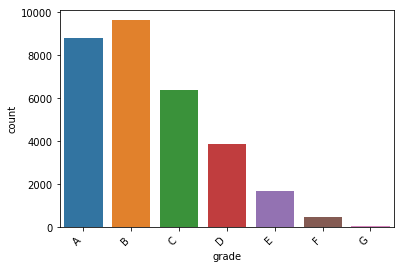

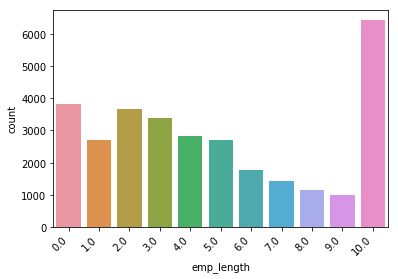

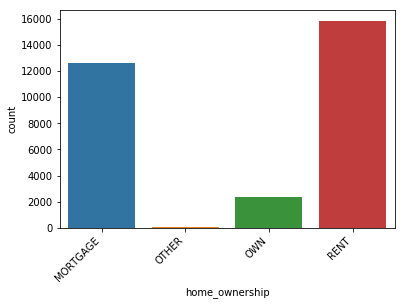

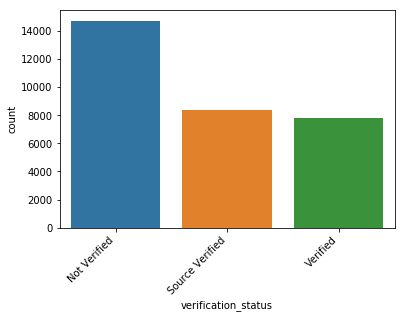

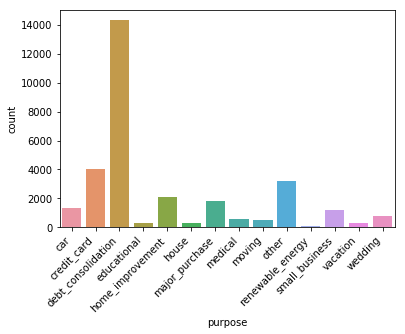

In [39]:
vc_column = ['grade','emp_length', 'home_ownership','verification_status','purpose']
for c in vc_column:
    sorted_order =df[c].value_counts().index.sort_values()
    ax = sns.countplot(data=df, x=c,  order=sorted_order)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
    plt.show()

1. The majority of customers fall into grades A, B, and C. 
2. They typically have more than 10 years of experience but do not own their homes outright; instead, their homes are either mortgaged or rented. 
3. Their source of income has not been verified
4. Their primary reason for applying for a loan is debt consolidation.

## plot with line 

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30924 entries, 0 to 39680
Data columns (total 21 columns):
loan_amnt                 30924 non-null int64
funded_amnt               30924 non-null int64
term                      30924 non-null int64
int_rate                  30924 non-null float64
installment               30924 non-null float64
grade                     30924 non-null object
emp_length                30924 non-null float64
home_ownership            30924 non-null object
annual_inc                30924 non-null float64
verification_status       30924 non-null object
issue_d                   30924 non-null datetime64[ns]
loan_status               30924 non-null object
purpose                   30924 non-null object
zip_code                  30924 non-null object
dti                       30924 non-null float64
mths_since_last_delinq    30924 non-null float64
revol_util                30924 non-null float64
total_pymnt               30924 non-null float64
pub_rec_bankru

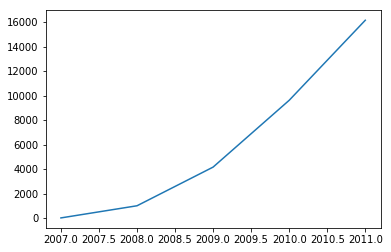

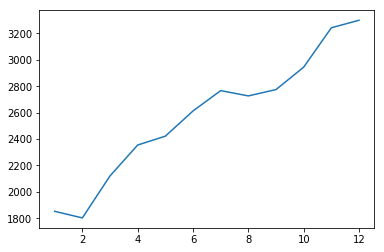

In [41]:
line_column = ['issue_y', 'issue_m']
for c in line_column:
    df[c].value_counts().sort_index().plot.line()
    plt.show()

> The number of customers has shown a upward trend over time.

# Bivatiate Analysis
> Based on univariate analysis, I decided to transition into bivariate analysis, with a focus on the following features:

1. term - The number of payments on the loan.
2. grade - LC assigned loan grade
3. emp_length  - Employment length in years
4. home_ownership - The home ownership status
5. verification_status - Indicates if income was verified by LC
6. purpose
7. issue_m - The month which the loan was funded
8. issue_y - The year which the loan was funded
9. total_pymnt - total ayments received 
10. int_rate - the interest rate on the loan
11. installment - The monthly payment 

## prepare visulize functions

In [61]:
def boxplot(df,column):
    rw = df.pivot_table(index=column, columns='loan_status', values='funded_amnt', aggfunc=len).reset_index()
    rw['total'] = rw['Charged Off'] + rw['Fully Paid']
    rw['charge_off_ratio'] = round(rw['Charged Off'] / rw['total'] * 100)
    sns.set(style="whitegrid")
    _, p = plt.subplots(1,3, figsize=(16, 4))
    ax = sns.countplot(x=column, order=df[column].value_counts().index.sort_values(), data=df,hue='loan_status',ax=p[2])
    bx = rw.plot.bar(x=column, y =['Fully Paid','Charged Off'],stacked=True,ax=p[1]  )
    cx  = rw.plot.bar(x=column, y ='charge_off_ratio',stacked=True,ax=p[0] )
    # Annotate the bars with count values
    for p in ax.patches:
        ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))     
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
    ax.set_xlabel('ratio per total for detail')
    bx.set_xlabel('ratio per total')
    cx.set_xlabel('charged_off_ratio from each value')
    plt.suptitle(f'The counts of Fully-Paid and Charged-Off customers by {column}')
    plt.tight_layout()
    # plt.title(f'The counts of Fully-Paid and Charged-Off customers by {column}')
   
    plt.show()
def lineplot(df, column, time):
    if time != None:
        plt.figure(figsize=(12, 6))
        new_df = df.pivot_table(index=column, columns='loan_status', values='funded_amnt', aggfunc=len).reset_index()
        sns.lineplot(data=new_df, x=column, y='Charged Off', color = 'r',label='Charged Off')
        sns.lineplot(data=new_df, x=column, y='Fully Paid', color = 'b',  label='Fully Paid')
        if time == 'm':
            plt.xlabel('Month')
        else:
            plt.xlabel('Year')
        plt.xticks(rotation=45) 
        plt.ylabel('Counts')
        plt.title('Loan Status Over Time')
        plt.show()
    else:
        new_df = df.pivot_table(index=column, columns='loan_status', values='funded_amnt', aggfunc=len).reset_index()
    
        plt.ylabel('Counts')
        plt.title('Loan Status Over Time')
        plt.show()

## The number of fully paid and charged-off customers over time

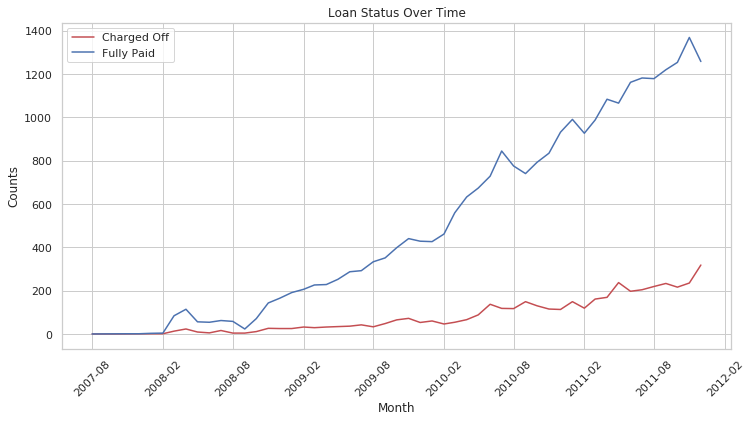

In [62]:
# line track trend charged of by month 
lineplot(df, 'issue_d', time = 'm')

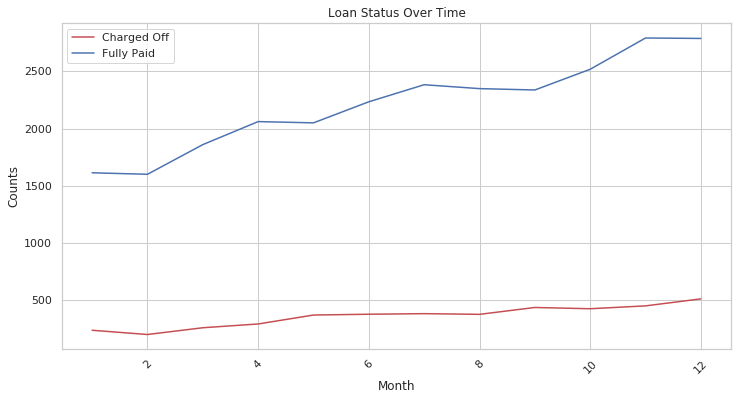

In [63]:
# line track trend charged of by avg month 
lineplot(df, 'issue_m', time = 'm')

> We have a slight lull in activity during the months of May and September. During this time, we observe an unusual occurrence where the number of fully-paid customers decreases while the number of charged-off customers increases.

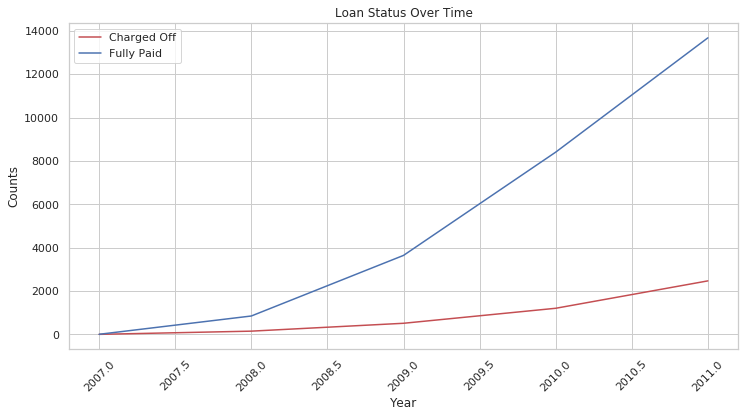

In [64]:
# line track trend charged of by year 
lineplot(df, 'issue_y', time = 'y')

>Over time, the customer count is on the rise, indicating an increase in both fully paid and charged-off customers. However, the rate of increase in fully paid customers is notably faster.


## The number of fully paid and charged-off customers by:
1. term
2. grade
3. emp_length
4. home_ownership
5. verification_status
6. purpose

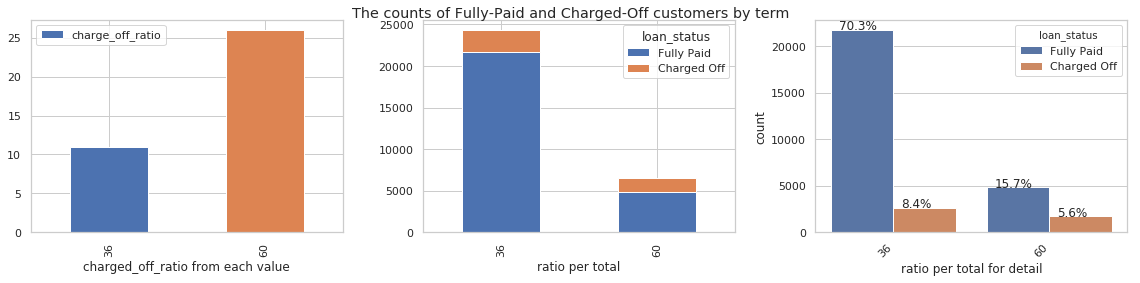

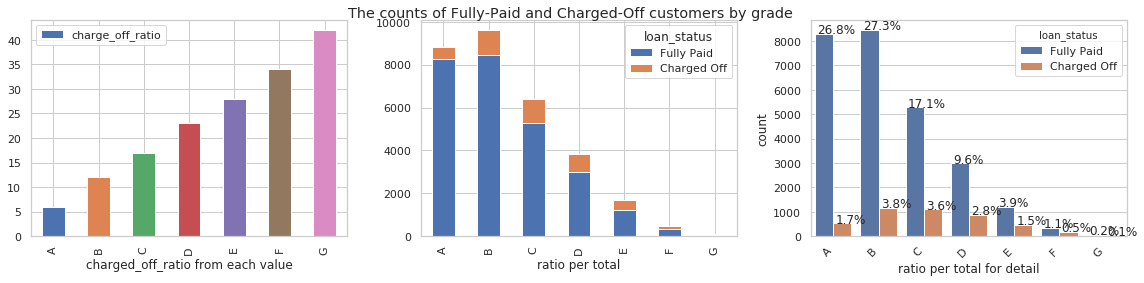

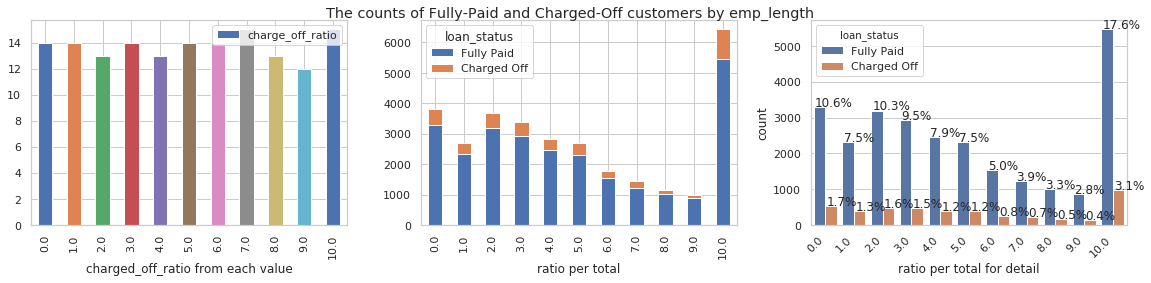

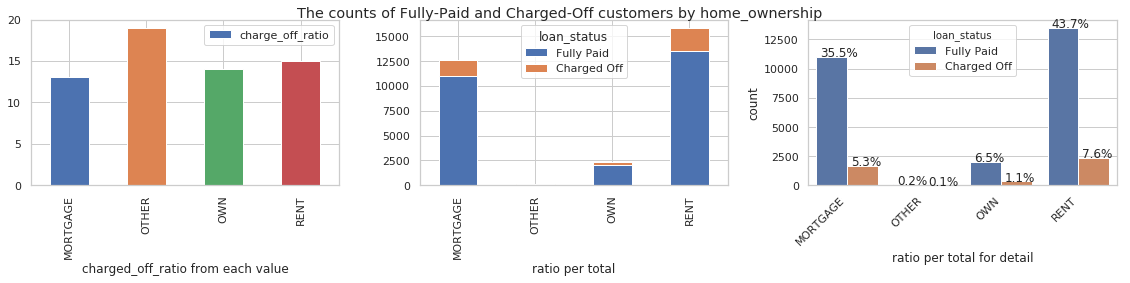

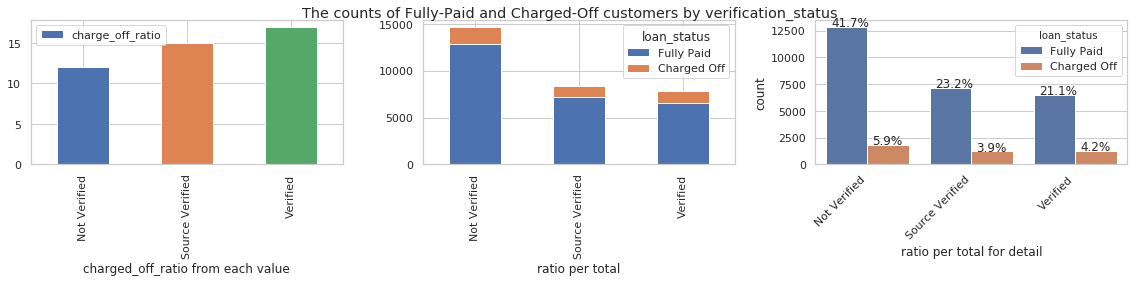

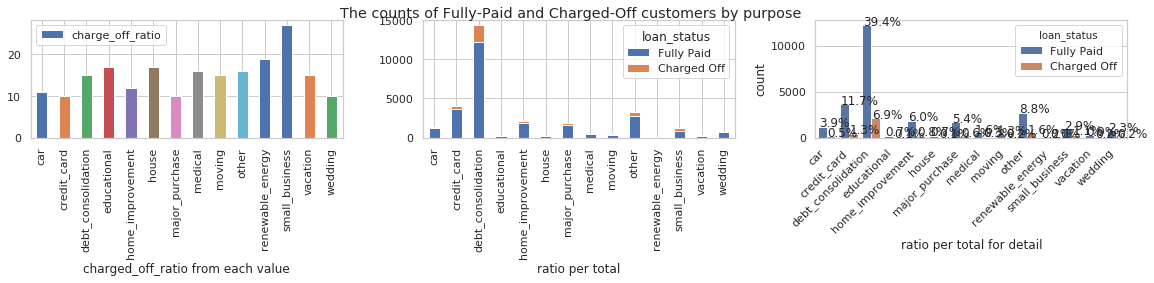

In [45]:
# emp_length is not a useful separable feature as there are all the lengths for each status
countplot_coulumns = ['term','grade','emp_length','home_ownership','verification_status', 'purpose']
for c in countplot_coulumns:
    boxplot(df,c)

> Here are the conclusions:
>> 1. The majority of customers have short-term loans, but long-term loans have a higher ratio of charged-off customers.
>> 2. The ratio of charged-off customers increases as Lending Club assigns a lower loan grade.

## em_length  analysis

In [46]:
def ana2(df, column):
    # columns has 2 values, ex: ['emp_length','installment']
    
    rw = df.pivot_table(index=column, columns='loan_status', values='funded_amnt', aggfunc=len).reset_index()
    new_df = rw.groupby(column[0]).agg({column[1]: 'mean', 'Charged Off': 'sum'}).reset_index()

    x1 = new_df[column[0]]
    x2 = new_df[column[1]]
    charged_off_sum = new_df['Charged Off']
    width = 0.35  # Width of the bars
    _, ax = plt.subplots(1,2, figsize=(16, 4))
    bar1 = ax[0].plot(np.arange(len(x1)), x2, label=f'Mean {column[1]}')
    # Create bars for 'Charged Off' sum, shift them to the right
    bar2 = ax[1].bar(np.arange(len(x1)) + width, charged_off_sum, width, label='Charged Off Sum', align='center')

    ax[0].set_xlabel('Employment Length')
    ax[0].set_ylabel('Count')
    ax[1].set_xlabel('Employment Length')
    ax[1].set_ylabel('Count')
    # ax.set_title('Mean Installment and Charged Off Sum by Employment Length')
    ax[0].set_xticks(np.arange(len(x1)))
    ax[0].set_xticklabels(x1)
    ax[0].legend()
    ax[1].legend()
    # Annotate the 'installment' values
    for i, value in enumerate(x2):
        ax[0].text(i, value, f'{value:.2f}', ha='center', va='bottom')
    # Annotate the 'Charged Off' values
    # for i, value in enumerate(charged_off_sum):
    #     ax.text(i + width, value, str(value), ha='center', va='bottom')
    plt.show()


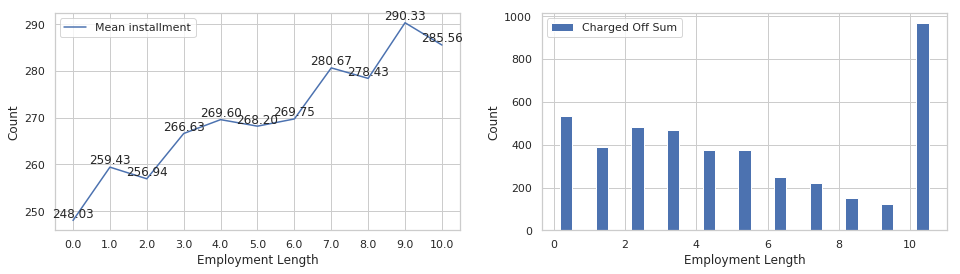

In [47]:
ana2(df, ['emp_length','installment'])

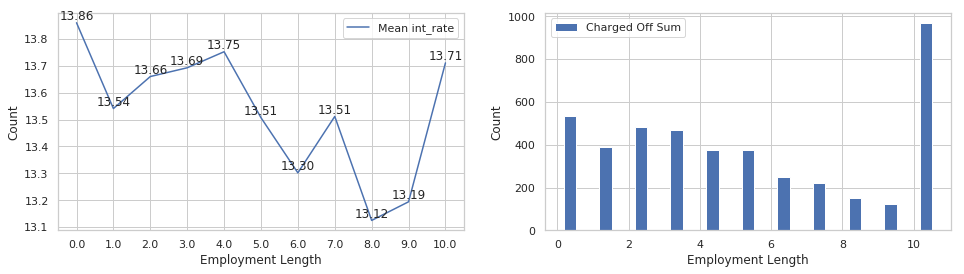

In [48]:
ana2(df, ['emp_length','int_rate'])

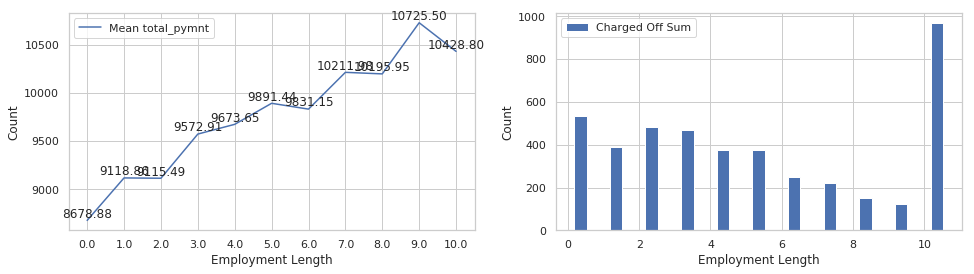

In [49]:
ana2(df, ['emp_length','total_pymnt'])

> Despite the monthly payments and total payments showing an increasing trend, the customer charges are trending downward. Because they have solid financial resources. The employment length of ten years or more may be considered an outlier, possibly due to a significant number of customers with over a decade of employment.

# Time analysis

In [90]:
column =['issue_y','total_pymnt']
def time_ana(df, column):
    _, ax = plt.subplots(1,2, figsize=(16, 4))
    # plot by year 
    rw = df.pivot_table(index='issue_y', columns='loan_status', values=column, aggfunc='mean').reset_index()
    year_x = sns.lineplot(data=rw, x='issue_y', y='Charged Off', color = 'r',label='Charged Off', ax = ax[0])
    sns.lineplot(data=rw, x='issue_y', y='Fully Paid', color = 'b',  label='Fully Paid', ax = ax[0])
    year_x.set_xlabel('Year')
    year_x.set_ylabel('Avg')
    # plot by month
    rw = df.pivot_table(index='issue_d', columns='loan_status', values=column, aggfunc='mean').reset_index()
    mon_x = sns.lineplot(data=rw, x='issue_d', y='Charged Off', color = 'r',label='Charged Off', ax = ax[1])
    mon_x= sns.lineplot(data=rw, x='issue_d', y='Fully Paid', color = 'b',  label='Fully Paid', ax = ax[1])
    mon_x.set_xlabel('Months')
    mon_x.set_ylabel('Avg')
    # mon_x.set_xticklabels(mon_x.get_xticklabels(), rotation=45, ha='right') 
    plt.xticks(rotation=45) 
    plt.suptitle('Loan Status Over Time')
    plt.show()

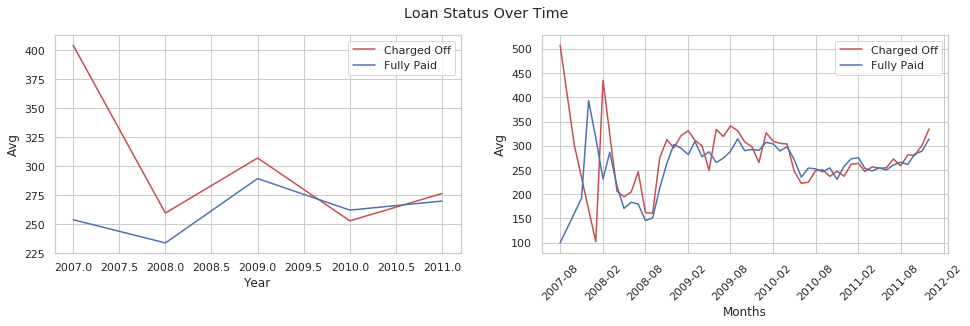

In [91]:
time_ana(df,'installment')

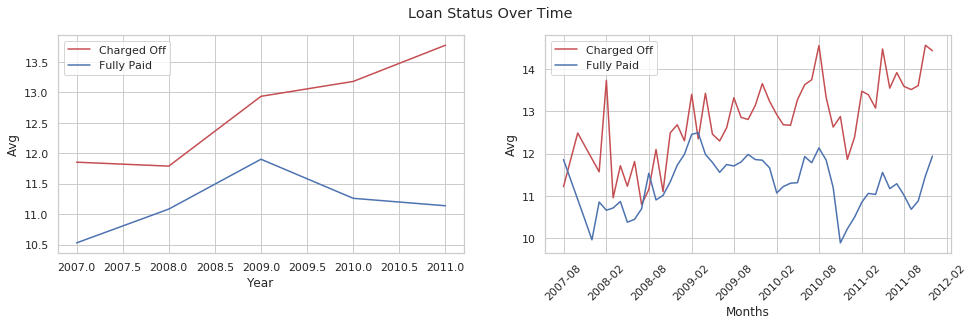

In [92]:
time_ana(df,'int_rate')

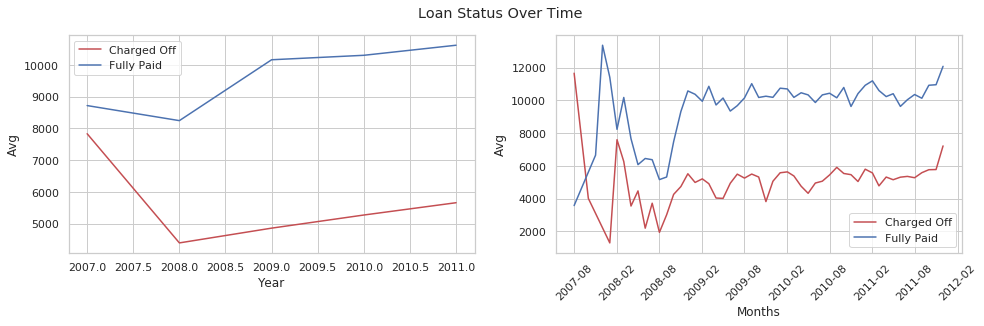

In [93]:
time_ana(df,'total_pymnt')

> The charge-off customers are subject to higher interest rates and lower total payments